In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf

# Simulación de Monte Carlo

La simulación de Monte Carlo en el contexto de los precios de las acciones, podemos considerar una serie de rendimientos de una acción (denotados por $r$) como una variable aleatoria que sigue una distribución normal con media $\mu$ y desviación estándar $\sigma$. Esto se puede expresar matemáticamente de la siguiente manera:

$$r \sim N(\mu, \sigma)$$

Para simular el precio futuro de la acción, se puede utilizar la ecuación de rendimiento compuesto, que nos permite calcular el precio futuro $(S)$ de una acción a partir del precio actual $(S_0)$ y los rendimientos $(r)$ durante un período de tiempo $(t)$:

$$ S = S_0 \cdot e^{\left(r - \frac{1}{2}\sigma^2 \right) t + \sigma \sqrt{t} \cdot z} $$

En esta ecuación, $S$ es el precio futuro de la acción, $S_0$ es el precio actual de la acción, $r$ es el rendimiento promedio de la acción ajustado por el riesgo, $\sigma$ es la desviación estándar de los rendimientos de la acción, $t$ es el período de tiempo y $z$ es un número aleatorio que sigue una distribución normal estándar. El término $\left(r - \frac{1}{2}\sigma^2 \right)t$ representa la tasa de crecimiento promedio de la acción durante el período de tiempo, y el término $\sigma \sqrt{t} \cdot z$ representa la variación aleatoria de los rendimientos.

Para simular el precio futuro de la acción utilizando la simulación de Monte Carlo, primero se deben estimar los valores de $\mu$ y $\sigma$ a partir de los rendimientos históricos de la acción. Luego, se pueden generar múltiples números aleatorios $z$ y utilizarlos en la ecuación de rendimiento compuesto para generar múltiples escenarios de precios futuros.

Por ejemplo, si queremos generar 1000 escenarios de precios futuros de una acción, podemos generar 1000 números aleatorios "z", utilizando la distribución normal estándar. Luego, podemos utilizar cada uno de estos números aleatorios en la ecuación de rendimiento compuesto para generar 1000 escenarios de precios futuros.

Finalmente, podemos utilizar estos escenarios de precios futuros para estimar la distribución de probabilidad de los precios futuros de la acción. Por ejemplo, podemos calcular el valor esperado (o media) y la desviación estándar de los precios futuros simulados para obtener una idea de la distribución de los precios futuros de la acción.

[*********************100%***********************]  1 of 1 completed


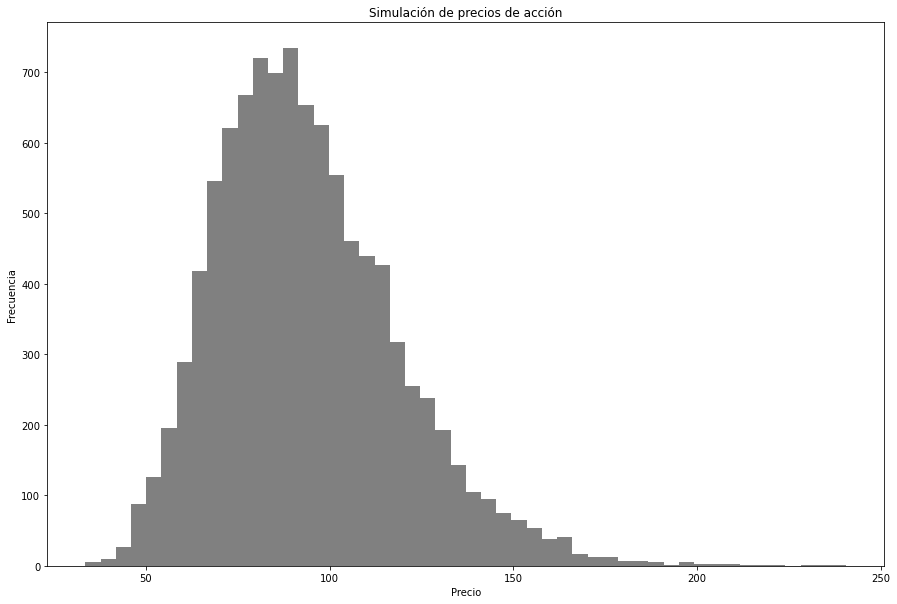

In [2]:
# Obtener datos históricos de una acción
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2019-12-31'

data = yf.download(ticker, start=start_date, end=end_date)

# Calcular los rendimientos logarítmicos
log_returns = np.log(1 + data['Adj Close'].pct_change())

# Calcular los parámetros de la simulación
mu = np.mean(log_returns)
sigma = np.std(log_returns)

# Generar números aleatorios
num_simulaciones = 10000
dias_futuros = 252

simulaciones = np.zeros((num_simulaciones, dias_futuros))

for i in range(num_simulaciones):
    sim_returns = np.random.normal(mu, sigma, dias_futuros)
    simulaciones[i, :] = (data['Adj Close'].iloc[-1]) * np.exp(np.cumsum(sim_returns))
    
# Graficar los resultados    
plt.figure(figsize=(15, 10))
plt.hist(simulaciones[:, -1], bins=50, color='Grey')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Simulación de precios de acción')
plt.show()